In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification


In [50]:
X,Y = make_classification(n_samples=1000,n_features = 6,n_informative=3,n_classes=4)

In [76]:
RF = RandomForestClassifier(max_depth=16,random_state=42)

In [77]:
RF = RF.fit(X,Y)

In [78]:
RF.feature_importances_

array([ 0.06090509,  0.13015767,  0.18728705,  0.22498857,  0.2954665 ,
        0.10119513])

In [79]:
# RF.predict([ 0.96131158,  0.98905803, -2.58661193,  1.68342564,  0.40663442,
#         0.20191016])
RF.predict(X[4:6,:])


array([2, 0])

In [80]:
from sklearn.metrics import confusion_matrix
y_pred = RF.predict(X)
cm = confusion_matrix(Y,y_pred)
cm

array([[246,   0,   2,   0],
       [  1, 249,   0,   0],
       [  2,   1, 251,   1],
       [  0,   4,   3, 240]])

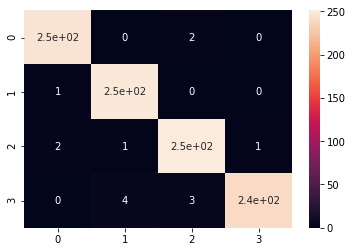

In [81]:
%matplotlib inline
import seaborn as sns
sns.heatmap(cm,annot=True)

In [82]:
from sklearn.metrics import precision_recall_fscore_support as score

p, r , f , _ = score(Y,y_pred)
print(p)
print(r)
print(f)

[ 0.98795181  0.98031496  0.98046875  0.99585062]
[ 0.99193548  0.996       0.98431373  0.97165992]
[ 0.98993964  0.98809524  0.98238748  0.98360656]


In [83]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth':range(2,25,2)
}

GR = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid=params,
    scoring='accuracy',
    n_jobs=-1)

In [84]:
GR = GR.fit(X,Y)

In [86]:
GR.best_estimator_.max_features

'auto'